In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [2]:
def realValuedMorletWavelet(t, f, w):
  return np.cos(2 * np.pi * f * t) * np.exp( ( -4*np.log(2)*(t**2) )/( w**2 ) )

def complexValuedMorletWavelet(t, f, w):
  return np.exp(1j * 2 * np.pi * f * t) * np.exp( ( -4*np.log(2)*(t**2) )/( w**2 ) )

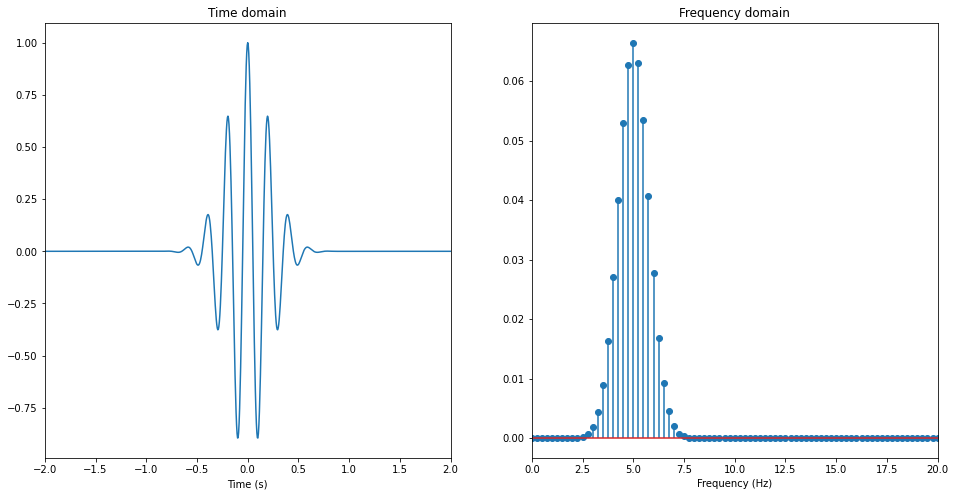

In [3]:
side = 2
w = .5
f = 5
srate = 2_00
t = np.arange(-side*srate,side*srate + 1/srate)/srate
N = len(t)

y = realValuedMorletWavelet(t, f, w)
frequDomain = np.abs(np.fft.fft(y)/N)
hz = np.linspace(0, srate/2, N//2 + 1)


fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(t, y)
ax[0].set_xlim([-side,side])
ax[0].set_title('Time domain')
ax[0].set_xlabel('Time (s)')

ax[1].stem(hz, frequDomain[:len(hz)], use_line_collection=True)
ax[1].set_title('Frequency domain')
ax[1].set_xlim([0, 20])
ax[1].set_xlabel('Frequency (Hz)')
plt.show()

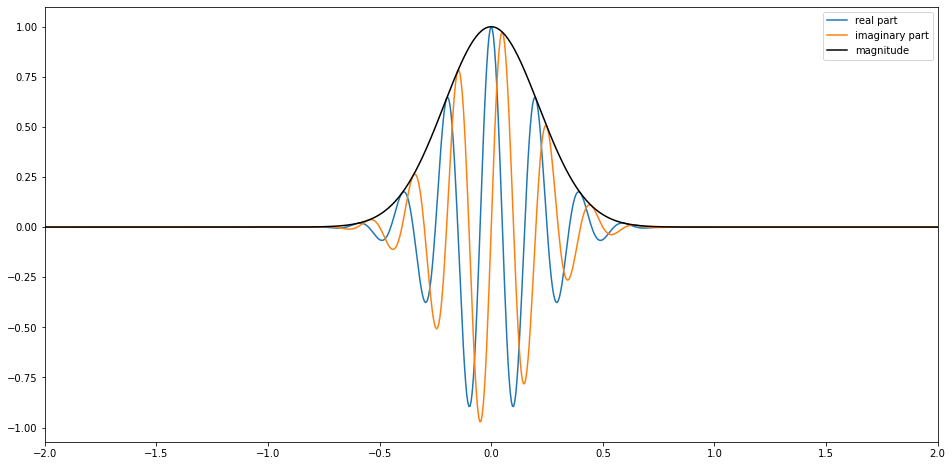

In [4]:
y = complexValuedMorletWavelet(t, f, w)

plt.figure(figsize=(16,8))
plt.plot(t, np.real(y), label='real part')
plt.plot(t, np.imag(y), label='imaginary part')
plt.plot(t, np.abs(y), 'k', label='magnitude')
plt.legend()
plt.xlim([-2,2])
plt.show()

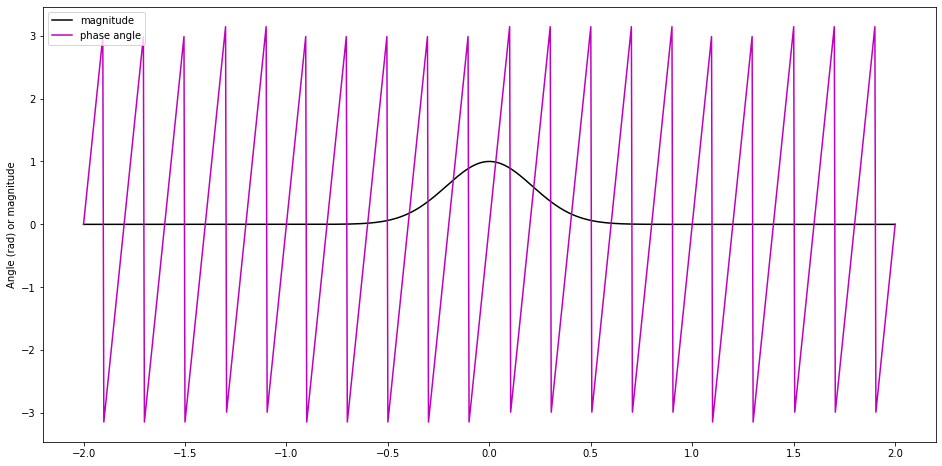

In [5]:
plt.figure(figsize=(16,8))
plt.plot(t, np.abs(y), 'k', label='magnitude')
plt.plot(t, np.angle(y), 'm', label='phase angle')
plt.legend()
plt.ylabel('Angle (rad) or magnitude')
plt.show()

In [40]:
side = 2
w = .5
f = 5
srate = 2_00
t = np.arange(-side*srate,side*srate + 1/srate)/srate
N = len(t)

f = np.arange(2, 2 + N)
f = np.linspace(2, 80, N)
w = np.linspace(4, 1, N)

result = np.zeros([N, N], dtype=complex)
for i in range(N):
  y = complexValuedMorletWavelet(t, f[i], w[i])
  for j in range(N):
    result[i, j] = y[j]


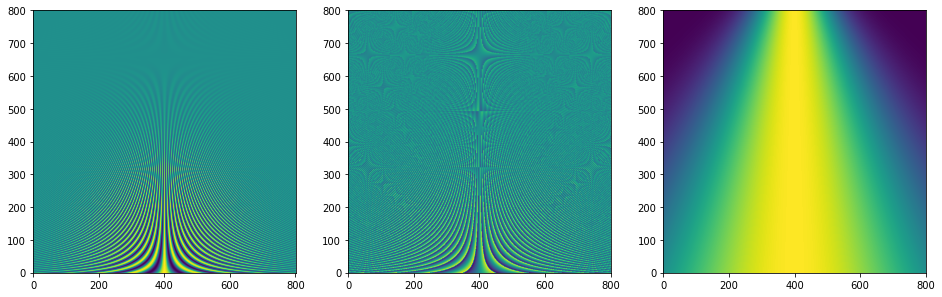

In [43]:
fig,ax = plt.subplots(1,3,figsize=(16,16))
ax[0].imshow(np.real(result),origin='lower')
ax[1].imshow(np.angle(result),origin='lower')
ax[2].imshow(np.abs(result),origin='lower')
plt.show()
